In [79]:
import sys
import imp
import smooziee.module.phonon_scattering as ph_scat
import smooziee.module.math_tools as math_tools
imp.reload(ph_scat)
import matplotlib.pyplot as plt

In [80]:
### experimental file name
filename = "/Users/keiyu/Project/PbTe_experiment/raw_data/PbTe_sq_GX711_p0p25_RT_4"

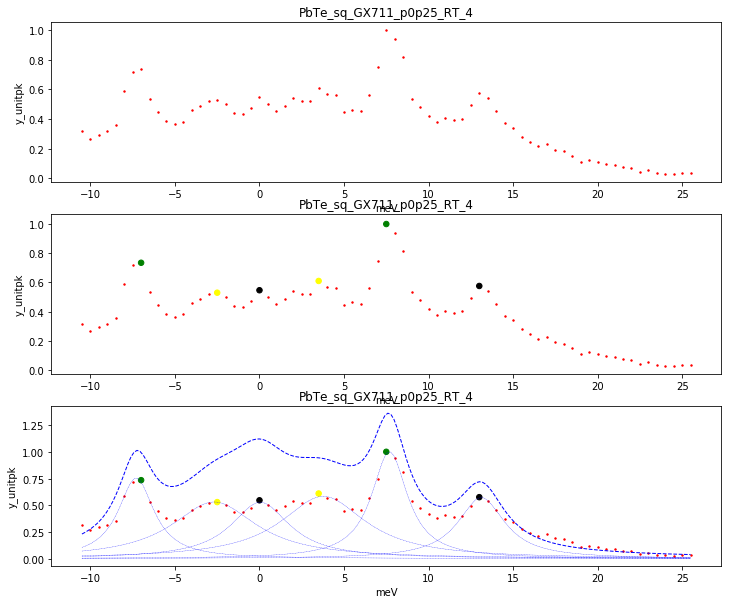

In [81]:
### find peak and find peak pair
### variables
order = 4
threshold = 5
idx_range = 2

### main
data = ph_scat.Process(filename)
data.find_peak(order=order, notice=False)
data.find_peak_pair(threshold=threshold, notice=False)
data.initial_fit(idx_range=idx_range, notice=False)

### plot
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
data.plot(ax1, run_mode='raw_data')
data.plot(ax2, run_mode='peak')
data.plot(ax3)
plt.show()


### best score was 0.0346873822179 ###


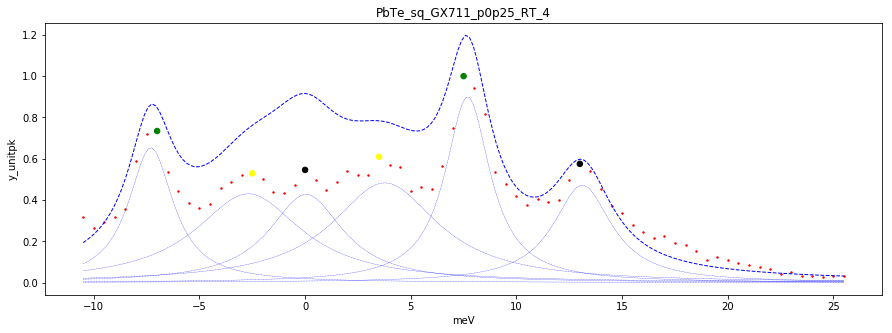

[[0.65405948620062404, -7.2959293320992238, 1.2898583939475707], [0.4304839085247476, -2.6840911098887816, 3.0696060090592816], [0.42770936398847803, 0.049564442109207262, 2.1284326310792276], [0.48329253831081775, 3.7715465252023592, 3.0696060090592816], [0.90142348359057267, 7.6909445219731385, 1.2898583939475707], [0.47207983078519722, 13.120079504296687, 1.6898906756586531]]


In [82]:
### grid search
grid_param = {'A':[3, 0.1], 'x0':[1, 0.5], 'd':[1, 0.02]}
data.make_grid_param(grid_param, notice=False)
data.grid_search(notice=False)

### plot
fig = plt.figure(figsize=(15, 5))
ax3 = fig.add_subplot(111)
data.plot(ax1, run_mode='raw_data')
data.plot(ax2, run_mode='peak')
data.plot(ax3)
plt.show()

### save best param
grid_best_param_lst = data.best_param_lst
print(grid_best_param_lst)

In [83]:
### reset
data.best_param_lst = grid_best_param_lst
print(grid_best_param_lst)

[[0.65405948620062404, -7.2959293320992238, 1.2898583939475707], [0.4304839085247476, -2.6840911098887816, 3.0696060090592816], [0.42770936398847803, 0.049564442109207262, 2.1284326310792276], [0.48329253831081775, 3.7715465252023592, 3.0696060090592816], [0.90142348359057267, 7.6909445219731385, 1.2898583939475707], [0.47207983078519722, 13.120079504296687, 1.6898906756586531]]


[[0.65405948620062404, -7.2959293320992238, 1.2898583939475707], [0.4304839085247476, -2.6840911098887816, 3.0696060090592816], [0.42770936398847803, 0.049564442109207262, 2.1284326310792276], [0.48329253831081775, 3.7715465252023592, 3.0696060090592816], [0.90142348359057267, 7.6909445219731385, 1.2898583939475707], [0.47207983078519722, 13.120079504296687, 1.6898906756586531]]
[[0.65405948620062404, -7.2959293320992238, 1.2898583939475707], [0.4304839085247476, -2.6840911098887816, 3.1696060090592817], [0.42770936398847803, 0.049564442109207262, 2.2284326310792277], [0.48329253831081775, 3.7715465252023592, 3.1696060090592817], [0.90142348359057267, 7.6909445219731385, 1.2898583939475707], [0.47207983078519722, 13.120079504296687, 1.6898906756586531]]


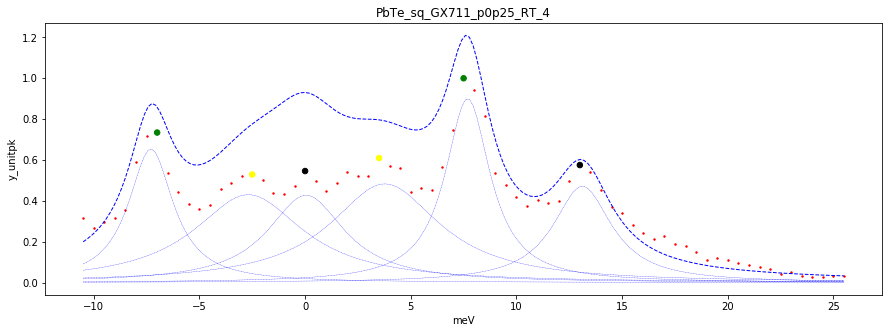

In [84]:
### by hand
# A -0  x0 - 1  d -2
# data.revise_best_param([[1,2,3],2,-0.1])
print(data.best_param_lst)
data.revise_best_param([[1,2,3],2,0.1])
print(data.best_param_lst)

### plot
fig = plt.figure(figsize=(15,5))
ax3 = fig.add_subplot(111)
data.plot(ax3)
plt.show()

In [85]:
### save
data.save("PbTe_sq_GX711_p0p25_RT_4.hdf5")

In [86]:
### load
data = ph_scat.Process(filename)
data.load("PbTe_sq_GX711_p0p25_RT_4.hdf5")

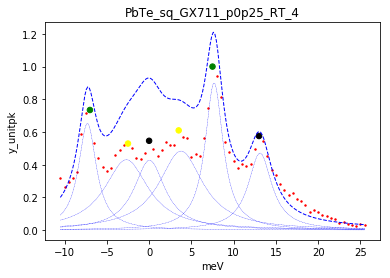

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
data.plot(ax)
plt.show()